# 분석

In [11]:
import pandas as pd 
import numpy as np 
from scipy import stats
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import signal

In [3]:
ls=sorted(glob.glob("recall*.xlsx"))
print(ls)
print(len(ls))


['recall no 100분의 1초 sample 1.xlsx', 'recall no 100분의 1초 sample 2.xlsx', 'recall no 100분의 1초 sample 3.xlsx', 'recall no 100분의 1초 sample 4.xlsx', 'recall no 100분의 1초 sample 5.xlsx', 'recall yes 100분의 1초.xlsx']
6


In [4]:
pd.read_excel(ls[0]).head() #피험자 번호 101A의 뇌파데이터 확인

,o1_alpha,o2_alpha,fp1_alpha,fp2_alpha,occ_blocking,occ_asymmetry,fp_asymmetry,index
0,-0.124828,0.496647,0.102974,-0.146172,0.371819,1.671448,5.767520,30332
1,0.213357,0.275406,-0.143956,-0.190776,0.488763,0.126953,0.139874,30333
2,-0.026344,-0.109385,0.078570,-0.030911,-0.135729,0.611811,-2.297190,30334
3,-0.539518,-0.153977,-0.070051,0.242281,-0.693494,-0.555940,1.813467,30335
4,-0.473961,-0.426184,-0.134402,0.152739,-0.900144,-0.053077,15.658682,30336


In [6]:
n1=pd.read_excel(ls[0])
n2=pd.read_excel(ls[1])
n3=pd.read_excel(ls[2])
n4=pd.read_excel(ls[3])
n5=pd.read_excel(ls[4])
y=pd.read_excel(ls[5])

In [8]:
import numpy

def smooth(x,window_len=11,window='hanning'):

    if x.ndim != 1:
        raise ValueError ("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError ("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError ("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


## 1. Attention Index

In [32]:
W=257
O=3
aiy=signal.savgol_filter(-(y.fp1_alpha)**2,W,O)
ain1=signal.savgol_filter(-(n1.fp1_alpha)**2,W,O)
ain2=signal.savgol_filter(-(n2.fp1_alpha)**2,W,O)
ain3=signal.savgol_filter(-(n3.fp1_alpha)**2,W,O)
ain4=signal.savgol_filter(-(n4.fp1_alpha)**2,W,O)
ain5=signal.savgol_filter(-(n5.fp1_alpha)**2,W,O)

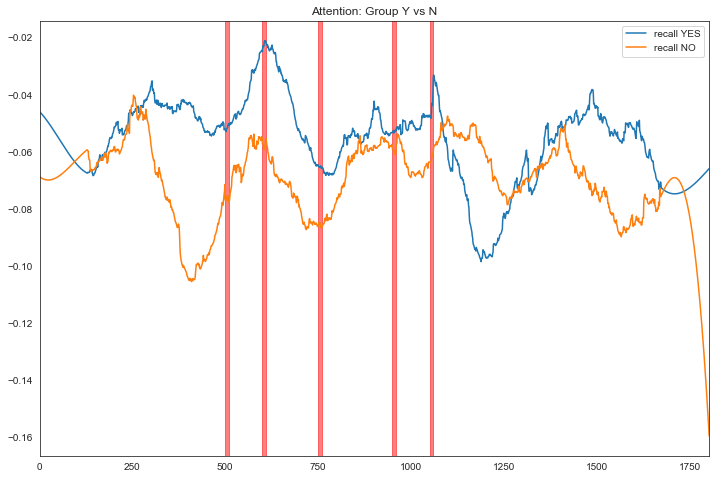

In [13]:
#Attention
result = pd.DataFrame({
                      'recall YES': aiy,
                     #  'recall NO': ain1,
                      #  'recall NO 2': ain2,
                       # 'recall NO 3': ain3,
                        'recall NO ': ain4,
                      #  'recall NO 5': ain5,
})

sns.set_style("white")
result.plot(title="Attention: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)

plt.gcf().set_size_inches(12,8)

## 2.Approach Index

In [18]:
awy=(y.fp2_alpha)**2-(y.fp1_alpha)**2
awn1=(n1.fp2_alpha)**2-(n1.fp1_alpha)**2
awn2=(n2.fp2_alpha)**2-(n2.fp1_alpha)**2
awn3=(((n3.fp2_alpha)**2)-(n3.fp1_alpha)**2)
awn4=(((n4.fp2_alpha)**2)-(n4.fp1_alpha)**2)
awn5=(((n5.fp2_alpha)**2)-(n5.fp1_alpha)**2)

W=257
O=3
awy=signal.savgol_filter(awy,W,O)
awn1=signal.savgol_filter(awn1,W,O)
awn2=signal.savgol_filter(awn2,W,O)
awn3=signal.savgol_filter(awn3,W,O)
awn4=signal.savgol_filter(awn4,W,O)
awn5=signal.savgol_filter(awn5,W,O)

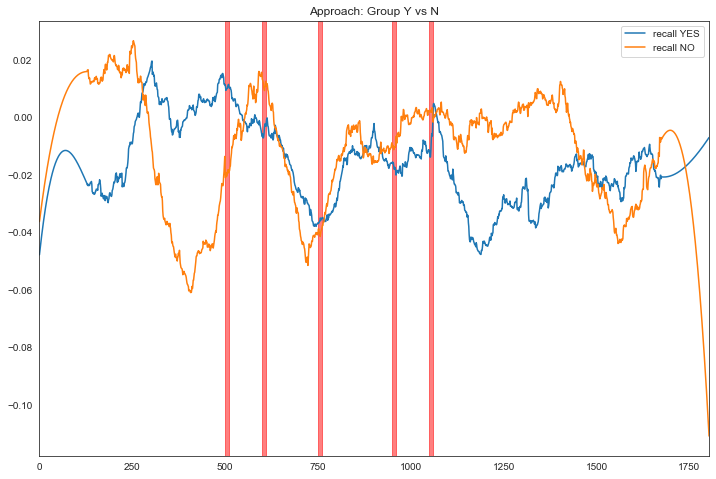

In [27]:
#Approach
result = pd.DataFrame({
                      'recall YES': awy,
                     #  'recall NO': awn1,
                      #  'recall NO 2': awn2,
                       # 'recall NO 3': awn3,
                        'recall NO ': awn4,
                      #  'recall NO 5': awn5,
})

sns.set_style("white")
result.plot(title="Approach: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)

plt.gcf().set_size_inches(12,8)

## 3. Occ. Alpha Blocking

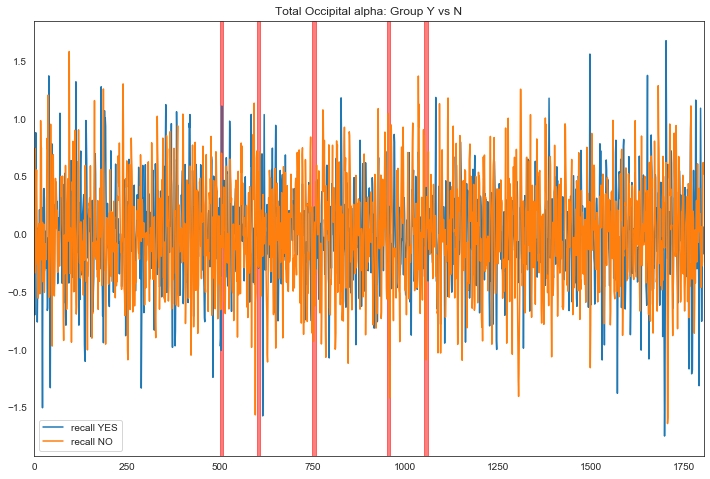

In [128]:

result = pd.DataFrame({
                      'recall YES': y.occ_blocking,
                      # 'recall NO 1': ain1,
                       # 'recall NO 2': ain2,
                       # 'recall NO 3': ain3,
                        'recall NO': n4.occ_blocking,
                       # 'recall NO 5': ain5,
})

sns.set_style("white")
result.plot(title="Total Occipital alpha: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)

plt.gcf().set_size_inches(12,8)

In [225]:
N=150
ocy=smooth(y.occ_blocking,window_len=N,window='hanning')
ocn4=smooth(n4.occ_blocking,window_len=N,window='hanning')

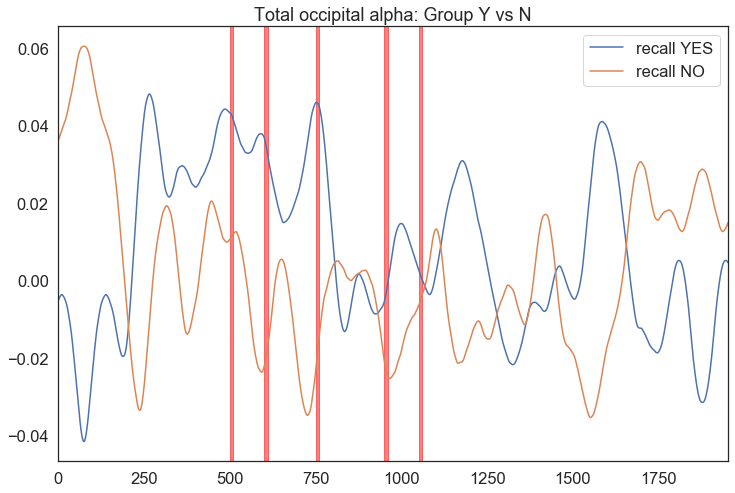

In [227]:

result = pd.DataFrame({
                      'recall YES': ocy,
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'recall NO': ocn4,
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="Total occipital alpha: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)

plt.gcf().set_size_inches(12,8)

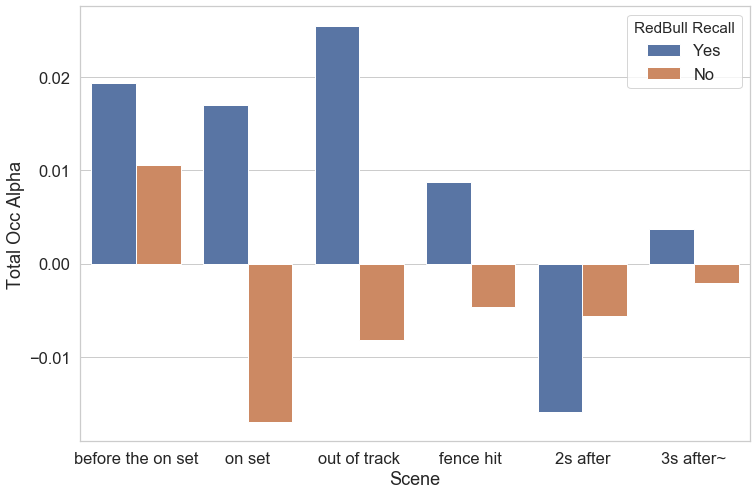

In [243]:
df=pd.DataFrame()
df['Total Occ Alpha'] = (y.occ_blocking[0:500].mean(),y.occ_blocking[500:600].mean(),y.occ_blocking[600:750].mean(),y.occ_blocking[750:950].mean(),y.occ_blocking[950:1050].mean(),y.occ_blocking[1050:].mean())
df['Scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['RedBull Recall']=('Yes')

dfn=pd.DataFrame()
dfn['Total Occ Alpha']= (n4.occ_blocking[0:500].mean(),n4.occ_blocking[500:600].mean(),n4.occ_blocking[600:750].mean(),n4.occ_blocking[750:950].mean(),n4.occ_blocking[950:1050].mean(),n4.occ_blocking[1050:].mean())
dfn['Scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['RedBull Recall']=('No')

a=pd.concat([df,dfn])

sns.set(style="whitegrid",font_scale=1.5)

ax = sns.barplot(x="Scene", y="Total Occ Alpha",hue="RedBull Recall", data=a)

plt.gcf().set_size_inches(12,8)

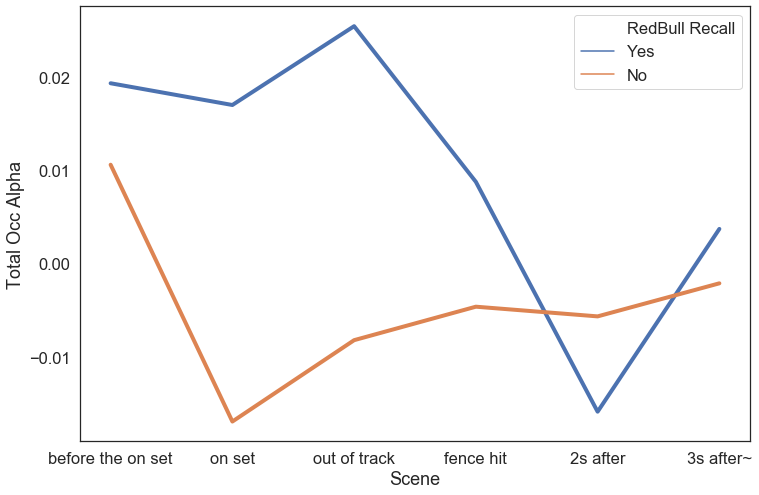

In [244]:
sns.set(style="white",font_scale=1.5)
ax = sns.lineplot(x="Scene", y="Total Occ Alpha",hue="RedBull Recall", data=a, sort=False, linewidth=4)
plt.gcf().set_size_inches(12,8)

## 4. Left Frontal. Alpha Blocking

In [190]:
N=150
lfy=smooth(y.fp1_alpha,window_len=N,window='hanning')
lfn1=smooth(n1.fp1_alpha,window_len=N,window='hanning')
lfn2=smooth(n2.fp1_alpha,window_len=N,window='hanning')
lfn3=smooth(n3.fp1_alpha,window_len=N,window='hanning')
lfn4=smooth(n4.fp1_alpha,window_len=N,window='hanning')
lfn5=smooth(n5.fp1_alpha,window_len=N,window='hanning')

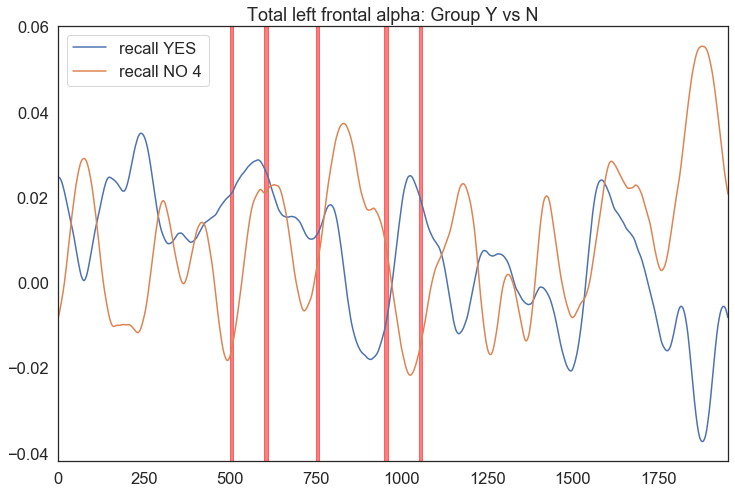

In [191]:

result = pd.DataFrame({
                      'recall YES': lfy,
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'recall NO 4': lfn4,
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="Total left frontal alpha: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.5)
plt.axvspan(600, 610, color='red', alpha=0.5)
plt.axvspan(750, 760, color='red', alpha=0.5)
plt.axvspan(950, 960, color='red', alpha=0.5)
plt.axvspan(1050, 1060, color='red', alpha=0.5)

plt.gcf().set_size_inches(12,8)

In [205]:
y['fp_blocking']=y.fp1_alpha
n4['fp_blocking']=n4.fp1_alpha

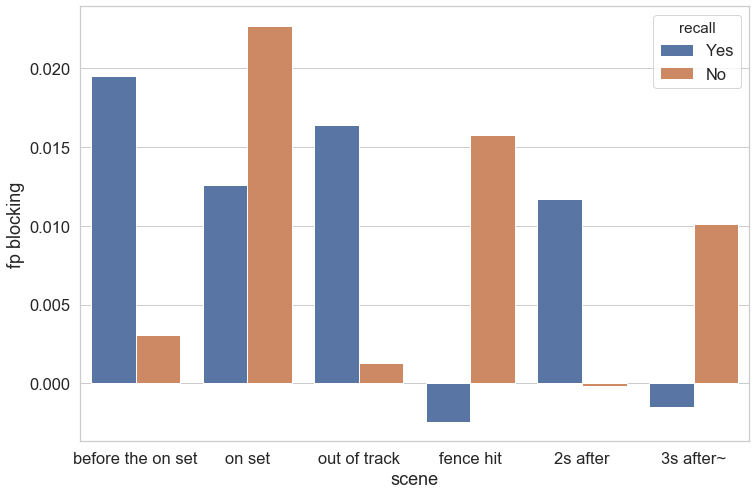

In [245]:
df=pd.DataFrame()
df['fp blocking'] = (y.fp_blocking[0:500].mean(),y.fp_blocking[500:600].mean(),y.fp_blocking[600:750].mean(),y.fp_blocking[750:950].mean(),y.fp_blocking[950:1050].mean(),y.fp_blocking[1050:].mean())
df['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['recall']=('Yes')

dfn=pd.DataFrame()
dfn['fp blocking']= (n4.fp_blocking[0:500].mean(),n4.fp_blocking[500:600].mean(),n4.fp_blocking[600:750].mean(),n4.fp_blocking[750:950].mean(),n4.fp_blocking[950:1050].mean(),n4.fp_blocking[1050:].mean())
dfn['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['recall']=('No')

a=pd.concat([df,dfn])

sns.set(style="whitegrid",font_scale=1.5)

ax = sns.barplot(x="scene", y="fp blocking",hue="recall", data=a)

plt.gcf().set_size_inches(12,8)

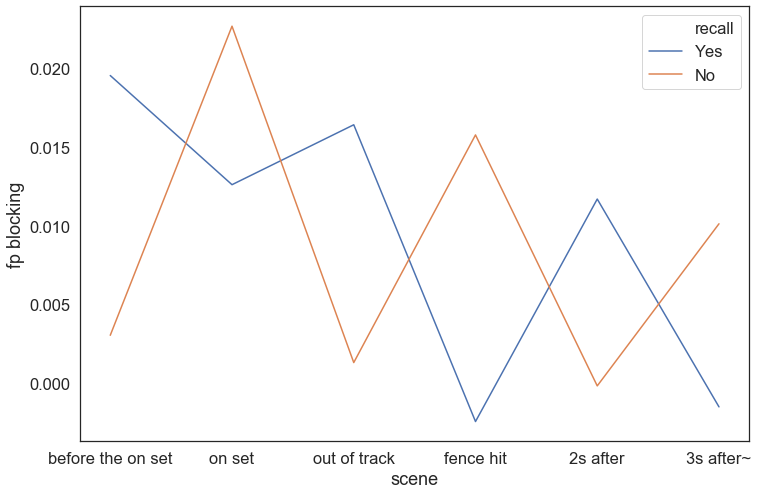

In [246]:
sns.set(style="white",font_scale=1.5)

ax = sns.lineplot(x="scene", y="fp blocking",hue="recall", data=a,sort=False)

plt.gcf().set_size_inches(12,8)

## 5. Frontal Dominance

In [33]:
y.head()

,o1_alpha,o2_alpha,fp1_alpha,fp2_alpha,occ_blocking,occ_asymmetry,fp_asymmetry,index
0,-0.217358,-0.037948,-0.000099,0.008588,-0.255306,-0.702723,1.023363,30332
1,-0.244282,-0.049190,-0.150250,0.169343,-0.293472,-0.664772,16.738735,30333
2,-0.182536,-0.515839,-0.365121,-0.087001,-0.698375,0.477256,-0.615144,30334
3,-0.056351,-0.109338,-0.084976,-0.107840,-0.165689,0.319800,0.118581,30335
4,0.046002,0.108742,-0.172573,-0.153664,0.154744,0.405442,-0.057961,30336


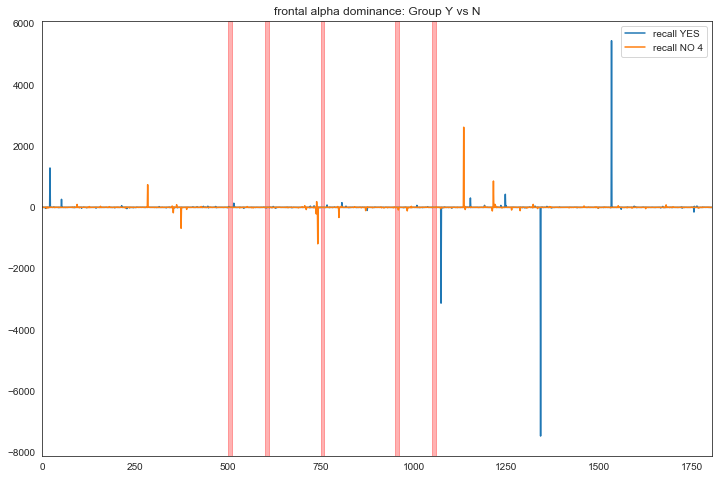

In [76]:

result = pd.DataFrame({
                      'recall YES': y.fp_asymmetry,
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'recall NO 4': n4.fp_asymmetry,
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="frontal alpha dominance: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.3)
plt.axvspan(600, 610, color='red', alpha=0.3)
plt.axvspan(750, 760, color='red', alpha=0.3)
plt.axvspan(950, 960, color='red', alpha=0.3)
plt.axvspan(1050, 1060, color='red', alpha=0.3)

plt.gcf().set_size_inches(12,8)

In [252]:
df=pd.DataFrame()
df['Frontal Dominance'] = (y.fp_asymmetry[:500].mean(),y.fp_asymmetry[500:600].mean(),y.fp_asymmetry[600:750].mean(),y.fp_asymmetry[750:950].mean(),y.fp_asymmetry[950:1050].mean(),y.fp_asymmetry[1050:].mean())
df['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['recall']=('Y')

dfn=pd.DataFrame()
dfn['Frontal Dominance']= (n4.fp_asymmetry[:500].mean(),n4.fp_asymmetry[500:600].mean(),n4.fp_asymmetry[600:750].mean(),n4.fp_asymmetry[750:950].mean(),n4.fp_asymmetry[950:1050].mean(),n4.fp_asymmetry[1050:].mean())
dfn['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['recall']=('N')

a=pd.concat([df,dfn])

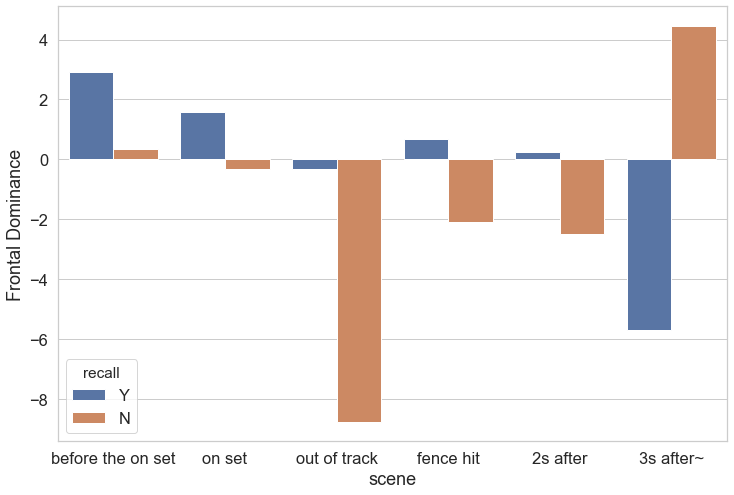

In [253]:
sns.set(style="whitegrid",font_scale=1.5)
ax = sns.barplot(x="scene", y='Frontal Dominance',hue="recall", data=a)
plt.gcf().set_size_inches(12,8)

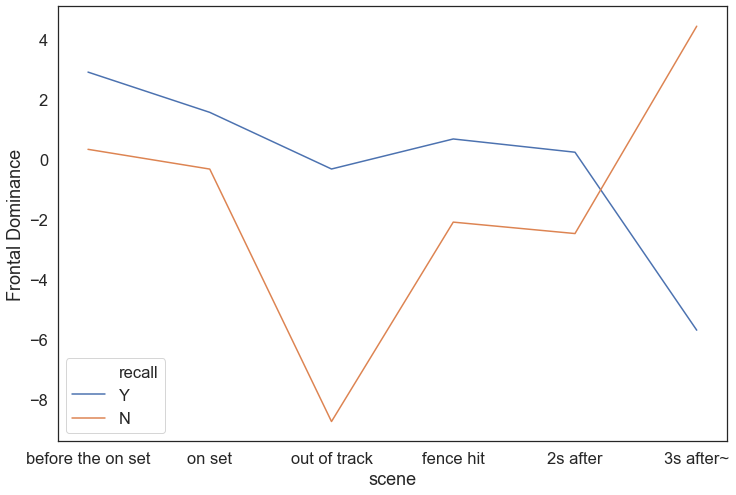

In [254]:
sns.set(style="white",font_scale=1.5)
ax = sns.lineplot(x="scene", y='Frontal Dominance',hue="recall", data=a,sort=False)
plt.gcf().set_size_inches(12,8)

## 6 Occ. Dominance

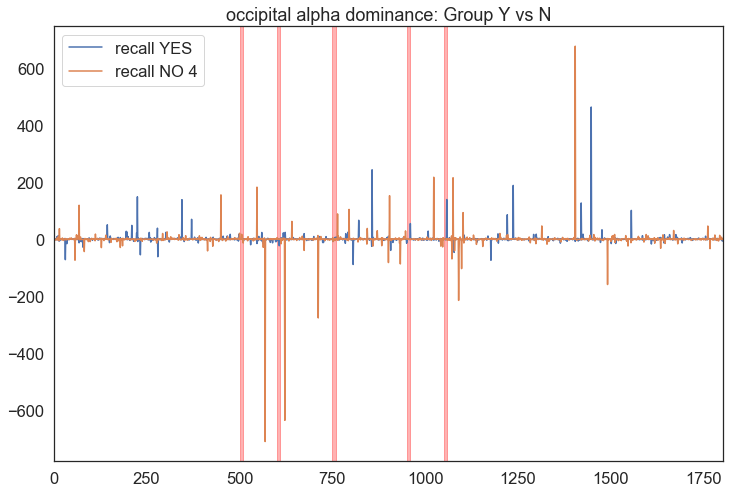

In [255]:

result = pd.DataFrame({
                      'recall YES': y.occ_asymmetry,
                       #'recall NO 1': ns1,
                      #  'recall NO 2': ns2,
                      #  'recall NO 3': ns3,
                        'recall NO 4': n4.occ_asymmetry,
                        #'recall NO 5': ns5,
})

sns.set_style("white")
result.plot(title="occipital alpha dominance: Group Y vs N")

plt.axvspan(500, 510, color='red', alpha=0.3)
plt.axvspan(600, 610, color='red', alpha=0.3)
plt.axvspan(750, 760, color='red', alpha=0.3)
plt.axvspan(950, 960, color='red', alpha=0.3)
plt.axvspan(1050, 1060, color='red', alpha=0.3)

plt.gcf().set_size_inches(12,8)

In [266]:
df=pd.DataFrame()
df['Occ Dominance'] = (y.occ_asymmetry[:500].mean(),y.occ_asymmetry[500:600].mean(),y.occ_asymmetry[600:750].mean(),y.occ_asymmetry[750:950].mean(),y.occ_asymmetry[950:1050].mean(),y.occ_asymmetry[1050:].mean())
df['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
df['recall']=('Y')

dfn=pd.DataFrame()
dfn['Occ Dominance']= (n4.occ_asymmetry[:500].mean(),n4.occ_asymmetry[500:600].mean(),n4.occ_asymmetry[600:750].mean(),n4.occ_asymmetry[750:950].mean(),n4.occ_asymmetry[950:1050].mean(),n4.occ_asymmetry[1050:].mean())
dfn['scene'] =('before the on set','on set', 'out of track','fence hit','2s after','3s after~')
dfn['recall']=('N')

a=pd.concat([df,dfn])

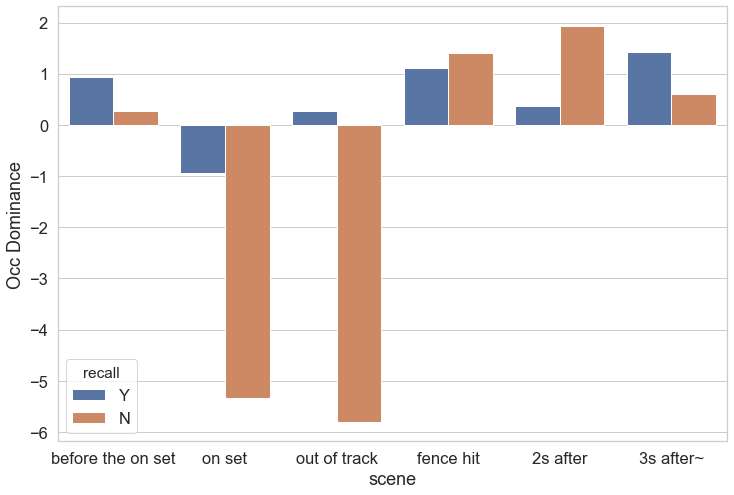

In [267]:
sns.set(style="whitegrid",font_scale=1.5)
ax = sns.barplot(x="scene", y="Occ Dominance",hue="recall", data=a)
plt.gcf().set_size_inches(12,8)

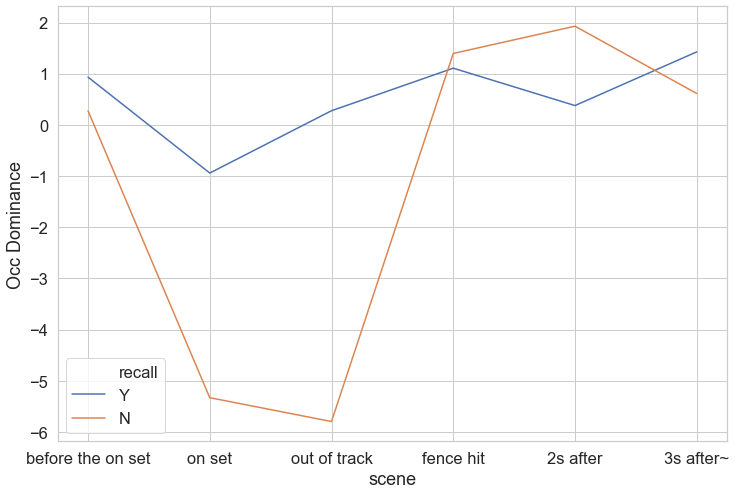

In [271]:
sns.set(style="whitegrid",font_scale=1.5)
ax = sns.lineplot(x="scene", y='Occ Dominance',hue="recall", data=a,sort=False)
plt.gcf().set_size_inches(12,8)

## END.